In [ ]:
# %load_ext autoreload
# %autoreload 2

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/PhD/faith_project

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/PhD/faith_project


In [2]:
from preprocessing.src import detect_faces, show_bboxes
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def extract_faces_from_image(image_path, reduce_resolution=False, reduction_ratio=0.5, resample=Image.NEAREST, enlargement_percentage = 0.8):
    img_resized = Image.open(image_path)
    plt.imshow(img_resized)
    plt.show()
    new_width = int(img_resized.width*reduction_ratio)
    new_height = int(img_resized.height*reduction_ratio)
    print(new_width, new_height)
    img_resized = img_resized.resize((new_width, new_height), resample=Image.NEAREST)
    bounding_boxes, landmarks = detect_faces(img_resized, min_face_size=20.0)
    img_resized_with_bb = show_bboxes(img_resized, bounding_boxes, landmarks)
    plt.imshow(img_resized_with_bb)
    plt.show()

    image_name = image_path.split('.')[0]

    for i, box in enumerate(bounding_boxes):
        x1, y1, x2, y2, _ = box
        width = x2 - x1
        height = y2 - y1

        # Calculate enlargement amounts
        x_enlargement = width * enlargement_percentage / 2
        y_enlargement = height * enlargement_percentage / 2

        # Adjust bounding box coordinates
        x1_enlarged = int(max(0, x1 - x_enlargement))
        y1_enlarged = int(max(0, y1 - y_enlargement))
        x2_enlarged = int(min(img_resized.width, x2 + x_enlargement))
        y2_enlarged = int(min(img_resized.height, y2 + y_enlargement))

        cropped_face = img_resized.crop((x1_enlarged, y1_enlarged, x2_enlarged, y2_enlarged))
        plt.imshow(cropped_face)
        plt.show()
        output_filename = f"{image_name}_{i}.jpg"  # Or .png
        #cropped_face.save(output_filename)
        print(f"Enlarged face {i+1} saved to {output_filename}")

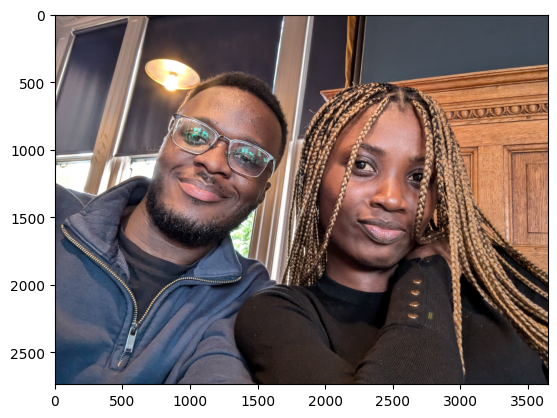

1824 1368


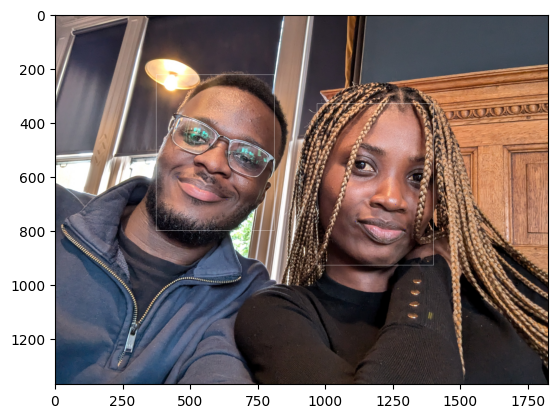

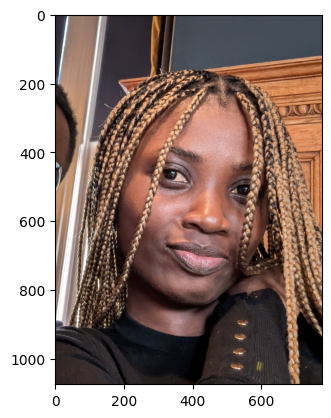

Enlarged face 1 saved to preprocessing/images/13_0.jpg


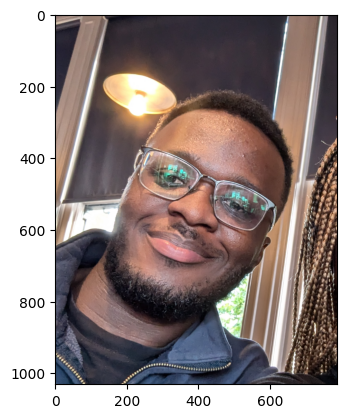

Enlarged face 2 saved to preprocessing/images/13_1.jpg


In [4]:
image_path = 'preprocessing/images/13.jpg'
extract_faces_from_image(image_path=image_path)

## image size reduction

In [31]:
def reduce_image_resolution(image_path, new_width=800, new_height=600, resample_method=Image.LANCZOS):
    """
    Reduces the resolution of an image using PIL.

    Args:
        image_path (str): The path to the input image file.
        output_path (str): The path to save the resized image.
        new_width (int): The desired width of the resized image.
        new_height (int): The desired height of the resized image.
        resample_method: The resampling method to use. Defaults to Image.LANCZOS.
                        Other options include:
                            Image.NEAREST (fastest, lowest quality)
                            Image.BILINEAR
                            Image.BICUBIC
                            Image.BOX
    """
    try:
        img = Image.open(image_path)
        img_resized = img.resize((new_width, new_height), resample=resample_method)
        #img_resized.save(output_path)
        #print(f"Image resized and saved to {output_path}")
        return img_resized

    except FileNotFoundError:
        print(f"Error: Image file not found at {image_path}")
    except Exception as e:
        print(f"An error occurred: {e}")


In [18]:
img = Image.open('images/test_image.jpg')
#img

In [82]:
file_loc = 'images/test_image.jpg'

file_loc.split(".")[0]

'images/test_image'

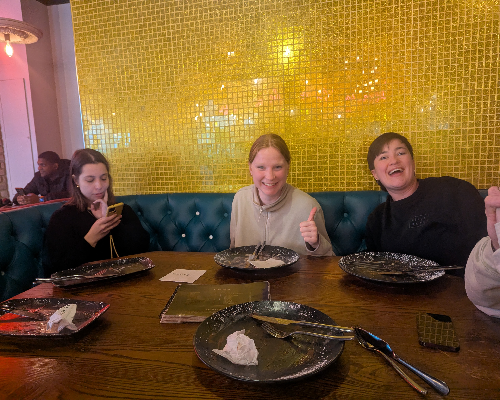

In [75]:
#output_image2 = "output_resized_nearest.png"
reduce_image_resolution("images/test_image.jpg", new_width= 500, new_height=400, resample_method=Image.NEAREST)

In [36]:
bounding_boxes

array([[ 61.79827213, 120.84121323,  85.43014407, 151.17549849,
          0.99998426],
       [200.62244508, 110.75875929, 227.43887205, 144.8671592 ,
          0.99997354],
       [299.62849128, 104.16181362, 327.61857766, 138.51963079,
          0.99988461]])

starting detect face
pnet weights loaded
models loaded
starting stage 1
starting stage 2
starting stage 3


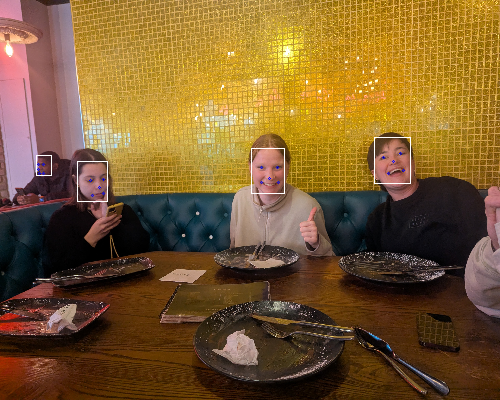

In [76]:
img_resize = reduce_image_resolution("images/test_image.jpg", new_width= 500, new_height=400, resample_method=Image.NEAREST)
img_resize
bounding_boxes, landmarks = detect_faces(img_resize)
show_bboxes(img_resize, bounding_boxes, landmarks)

In [77]:
# def crop_faces_5_values(image_path, bounding_boxes, output_prefix="face_crop"):
#     """
#     Crops faces from an image based on bounding box coordinates (5 values).

#     Args:
#         image_path (str): Path to the input image.
#         bounding_boxes (list of lists): List of bounding boxes, where each box is a list of 5 values:
#                                          [x1, y1, x2, y2, confidence]. We only use the first 4.
#         output_prefix (str): Prefix for the output cropped face filenames.
#     """
#     try:
#         #img = Image.open(image_path)
#         img = img_resize
#         for i, box in enumerate(bounding_boxes):
#             print(i, box)
#             x1, y1, x2, y2, _ = box  # Extract the first 4 values, ignore the 5th
#             cropped_face = img.crop((x1, y1, x2, y2))
#             output_filename = f"{output_prefix}_{i}.jpg"  # Or .png
#             #cropped_face.save(output_filename)
#             plt.imshow(cropped_face)
#             plt.show()
#             print(f"Cropped face {i+1} saved to {output_filename}")

#     except FileNotFoundError:
#         print(f"Error: Image file not found at {image_path}")
#     except Exception as e:
#         print(f"An error occurred: {e}")




def crop_and_show_enlarged_faces_jupyter(image_path, bounding_boxes, enlargement_percentage=0.2, output_prefix="enlarged_face"):
    """
    Crops and displays enlarged faces in Jupyter Notebook.

    Args:
        image_path (str): Path to the input image.
        bounding_boxes (list of lists): List of bounding boxes, [x1, y1, x2, y2, confidence].
        enlargement_percentage (float): Percentage to enlarge the bounding box (e.g., 0.2 for 20%).
        output_prefix (str): Prefix for the output cropped face filenames.
    """
    try:
        #img = Image.open(image_path)
        img = img_resize
        for i, box in enumerate(bounding_boxes):
            x1, y1, x2, y2, _ = box
            width = x2 - x1
            height = y2 - y1

            # Calculate enlargement amounts
            x_enlargement = width * enlargement_percentage / 2
            y_enlargement = height * enlargement_percentage / 2

            # Adjust bounding box coordinates
            x1_enlarged = int(max(0, x1 - x_enlargement))
            y1_enlarged = int(max(0, y1 - y_enlargement))
            x2_enlarged = int(min(img.width, x2 + x_enlargement))
            y2_enlarged = int(min(img.height, y2 + y_enlargement))

            cropped_face = img.crop((x1_enlarged, y1_enlarged, x2_enlarged, y2_enlarged))

            # Display the cropped image in Jupyter
            plt.imshow(cropped_face)
            plt.show()
            # plt.title(f"Enlarged Face {i+1}")
            # plt.axis('off')
            # plt.show()

            #output_filename = f"{output_prefix}_{i}.jpg"  # Or .png
            #cropped_face.save(output_filename)
            #print(f"Enlarged face {i+1} saved to {output_filename}")

    except FileNotFoundError:
        print(f"Error: Image file not found at {image_path}")
    except Exception as e:
        print(f"An error occurred: {e}")

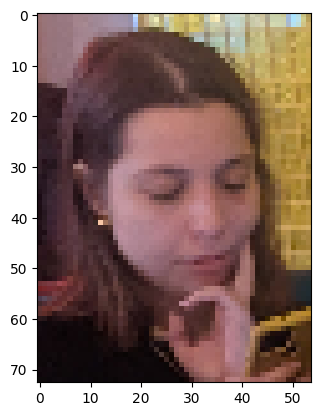

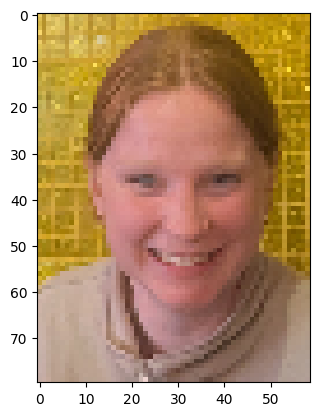

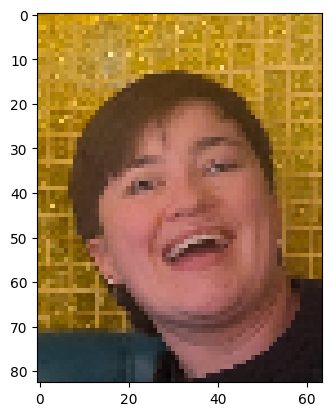

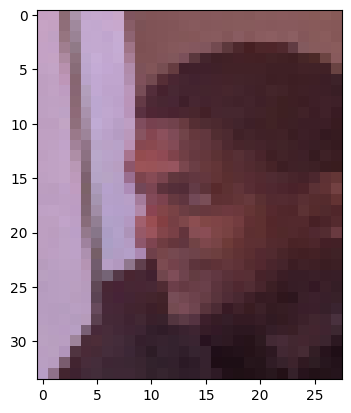

In [78]:
crop_and_show_enlarged_faces_jupyter("images/test_image.jpg", bounding_boxes, enlargement_percentage=0.8)

In [ ]:
img = Image.open('images/office2.jpg')
bounding_boxes, landmarks = detect_faces(img)
show_bboxes(img, bounding_boxes, landmarks)

In [ ]:
img = Image.open('images/office3.jpg')
bounding_boxes, landmarks = detect_faces(img)
show_bboxes(img, bounding_boxes, landmarks)

In [ ]:
img = Image.open('images/office4.jpg')
bounding_boxes, landmarks = detect_faces(img, thresholds=[0.6, 0.7, 0.85])
show_bboxes(img, bounding_boxes, landmarks)

In [ ]:
img = Image.open('images/office5.jpg')
bounding_boxes, landmarks = detect_faces(img, min_face_size=10.0)
show_bboxes(img, bounding_boxes, landmarks)